<a href="https://colab.research.google.com/github/Manojgharge07/Machine_Learning_Data_Science/blob/main/ML_27K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import The Library**

pandas: Used for data manipulation and analysis

numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.

matplotlib : It’s plotting library, and we are going to use it for data visualization

KMeans: Sklearn library for K-Means clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Load Data**

We are going to use ‘Mall_Customers.csv’ CSV file

Dataset contains 5 columns CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)

In [3]:
#df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv')
df = pd.read_csv('/content/drive/MyDrive/All CSV files/Mall_Customers.csv')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Understanding The Data**

There are total 200 training example without any label to indicate which customer belong which group

We are going to use annual income and spending score to find the clusters in data. Note that spending score is from 1 to 100 which is assigned by the mall based on customer behavior and spending nature

Text(0.5, 1.0, 'Unlabelled Mall Customer Data')

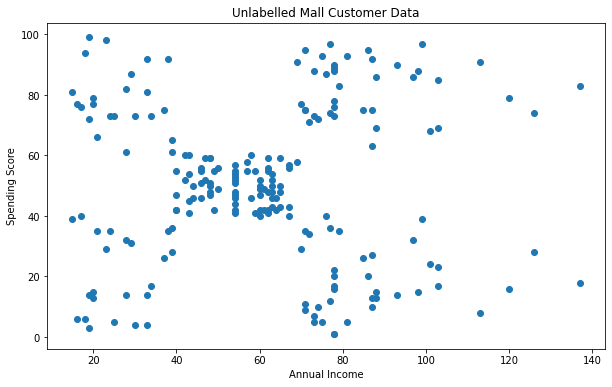

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Unlabelled Mall Customer Data')

In [5]:
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
X = df.iloc[:, [3,4]].values
X[:5] # Show first 5 records only

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


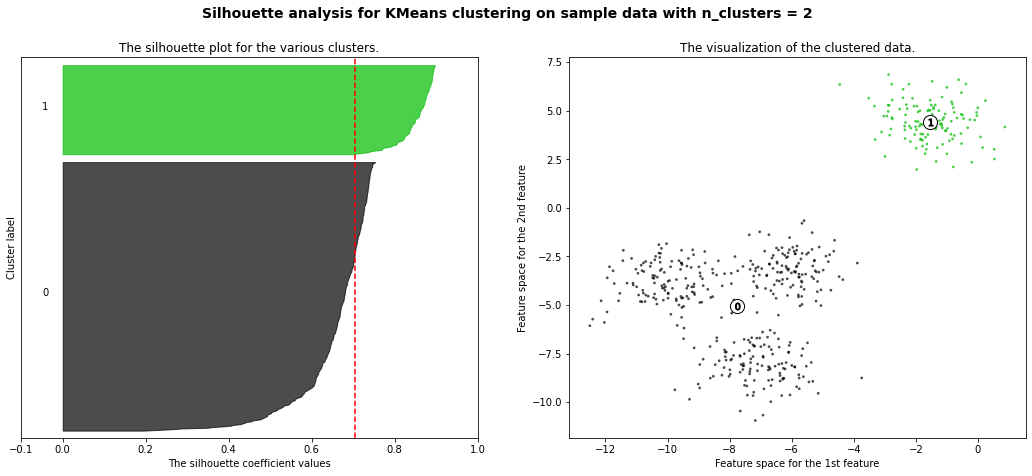

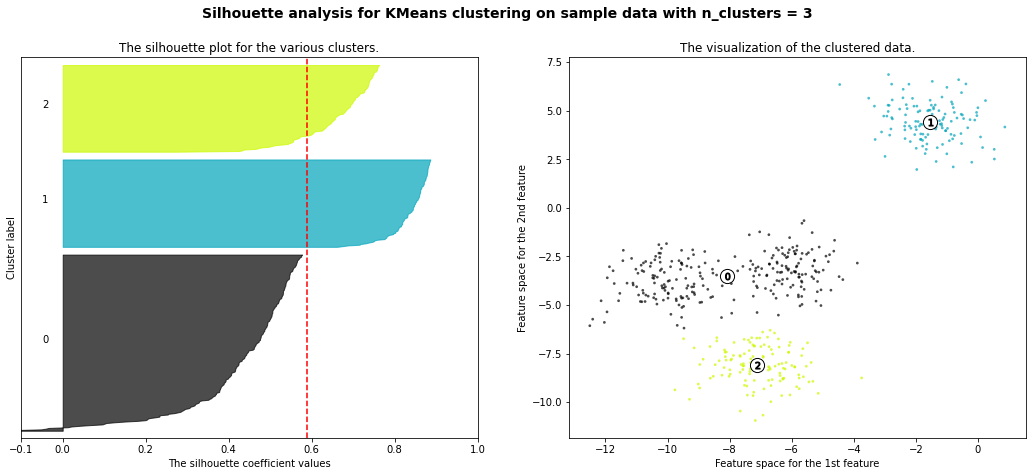

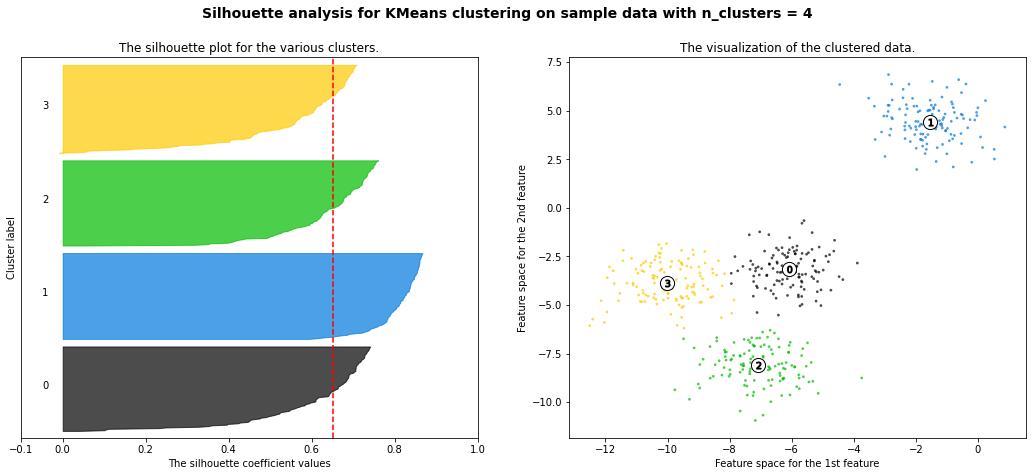

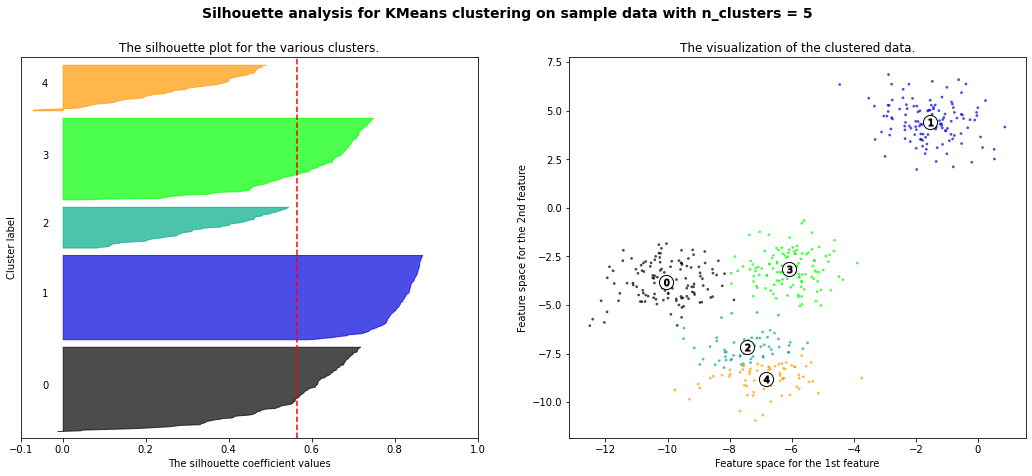

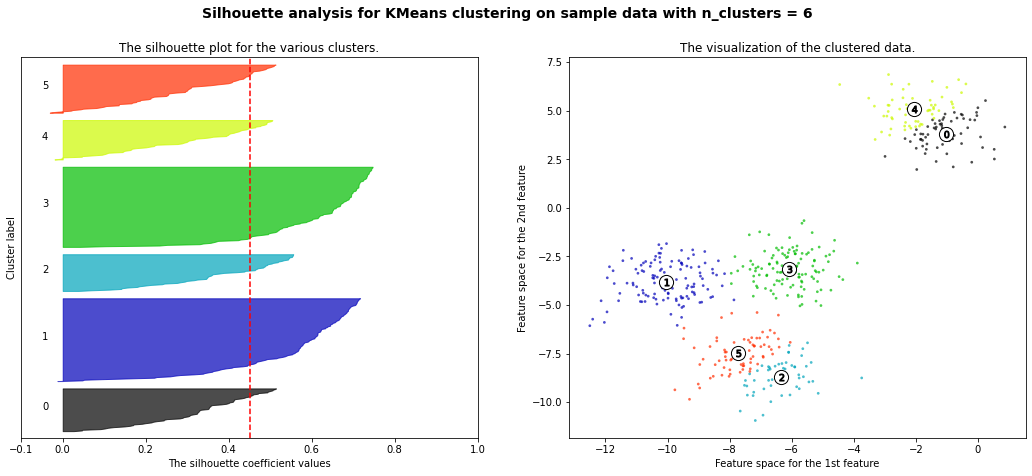

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# **Elbow Method**

Using the elbow method to find the optimal number of clusters. Let's use 1 to 11 as range of clusters.

We will use 'random' initialization method for this study.

Note that Sklearn K-Means algorithm also have ‘k-means++’ initialization method. It selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

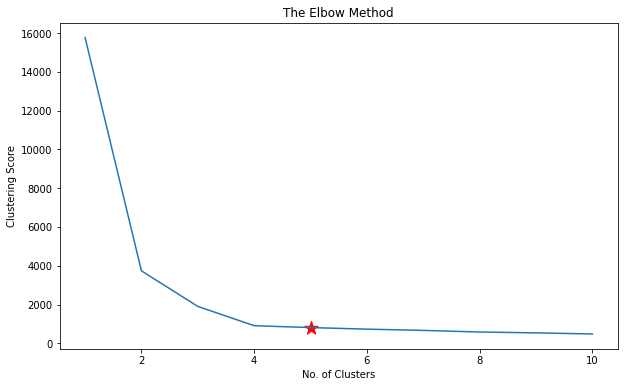

In [7]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

# **Compute K-Means Clustering**

Compute cluster centers and predict cluster index for each sample. Since K=5 we will get the cluster index from 0 to 4 for every data point in our dataset.

In [8]:
kmeans= KMeans(n_clusters = 7, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([5, 2, 1, 0, 4, 3, 4, 4, 1, 4, 5, 2, 4, 3, 4, 2, 1, 2, 3, 4, 6, 6,
       4, 0, 4, 4, 3, 3, 6, 4, 2, 0, 4, 5, 4, 5, 6, 6, 5, 1, 4, 1, 3, 4,
       4, 5, 6, 4, 0, 0, 3, 6, 1, 4, 2, 6, 6, 6, 1, 4, 0, 0, 1, 4, 0, 4,
       2, 4, 6, 1, 2, 6, 4, 5, 4, 4, 5, 4, 4, 1, 3, 0, 1, 0, 3, 6, 1, 0,
       6, 1, 3, 2, 1, 4, 3, 2, 2, 4, 2, 3, 3, 2, 0, 6, 0, 4, 4, 3, 0, 6,
       4, 5, 0, 6, 0, 6, 3, 4, 3, 4, 6, 2, 2, 1, 4, 1, 3, 5, 2, 4, 3, 1,
       1, 6, 1, 2, 3, 4, 0, 0, 4, 2, 4, 3, 3, 0, 4, 4, 5, 2, 1, 1, 0, 5,
       3, 6, 1, 1, 6, 1, 6, 6, 6, 1, 3, 2, 5, 2, 4, 3, 2, 1, 4, 2, 3, 1,
       6, 6, 6, 2, 4, 1, 3, 2, 5, 2, 4, 5, 5, 2, 0, 3, 5, 2, 4, 0, 4, 5,
       2, 0, 5, 6, 0, 4, 4, 2, 4, 6, 5, 4, 6, 4, 6, 2, 4, 4, 4, 3, 1, 0,
       4, 2, 6, 4, 6, 6, 6, 3, 1, 3, 5, 6, 5, 1, 0, 0, 1, 2, 3, 5, 4, 1,
       2, 5, 2, 5, 4, 1, 5, 6, 4, 3, 0, 4, 4, 3, 1, 4, 6, 3, 4, 3, 1, 1,
       3, 4, 5, 5, 1, 6, 6, 4, 3, 0, 4, 3, 6, 2, 3, 5, 3, 5, 2, 3, 2, 0,
       0, 1, 6, 1, 6, 4, 4, 1, 5, 3, 5, 2, 2, 4, 1,

In [9]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 4    47
2    29
1    28
6    28
3    27
0    23
5    18
Name: Cluster, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,5
198,199,Male,32,137,18,2


## **Visualization**

Let's plot the centroid and cluster with different colors to visualize, how K-Means algorithm has grouped the data.

Text(0.5, 1.0, 'Customer Clusters')

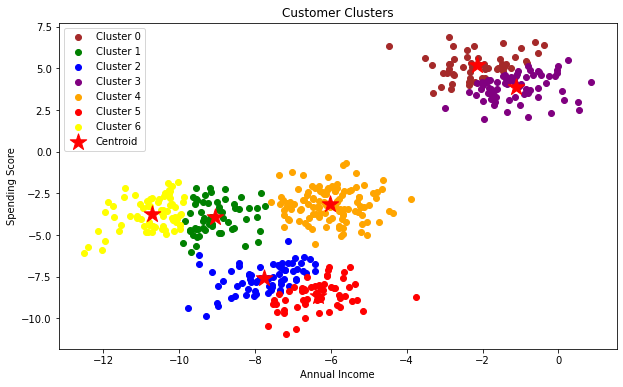

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')
plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c = 'red', label = 'Cluster 5')
plt.scatter(X[pred == 6, 0], X[pred == 6, 1], c = 'yellow', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [11]:
def plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color):
    """
    This function will plot the path taken by the centroids
    
    I/P:
    * centroid_history: 2D array of centroids. Each element represent the centroid coordinate. 
      If there are 5 clusters then first set contains initial cluster cordinates
      (i.e. first 5 elements) and then k_means loop will keep appending new cluster coordinates for each iteration
    * n_clusters: Total number of clusters to find
    * centroid_sets: At the start we set random values as our first centroid set. K-Means loop will keep adding 
    new centroid sets to centroid_history. Since we are ploting the path of centroid locations, centroid set value 
    will be K-Means loop iteration number plus 1 for initial centroid set. 
    So its value will be from 2 to K-Means loops max iter plus 1
    * cluster_color: Just to have same line and cluster color
    
    O/P: Plot the centroid path
    """
    c_x = [] # To store centroid X coordinated
    c_y=[]   # To store the centroid Y coordinates
    for i in range(0, n_clusters):
        cluster_index = 0
        for j in range(0, centroid_sets):
            c_x = np.append(c_x, centroid_history[:,0][i + cluster_index])
            c_y = np.append(c_y, centroid_history[:,1][i + cluster_index])
            cluster_index = cluster_index + n_clusters
            # if there are 5 clusters then first set contains initial cluster cordinates and then k_means loop will keep appending new cluster coordinates for each iteration
        
        plt.plot(c_x, c_y, c= cluster_color['c_' + str(i)], linestyle='--')
        
        # Reset coordinate arrays to avoid continuous lines
        c_x = []
        c_y=[]

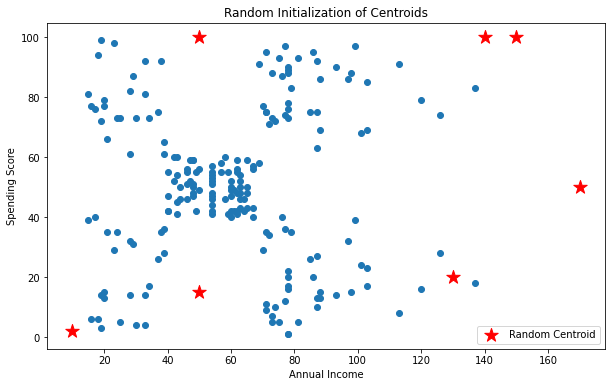

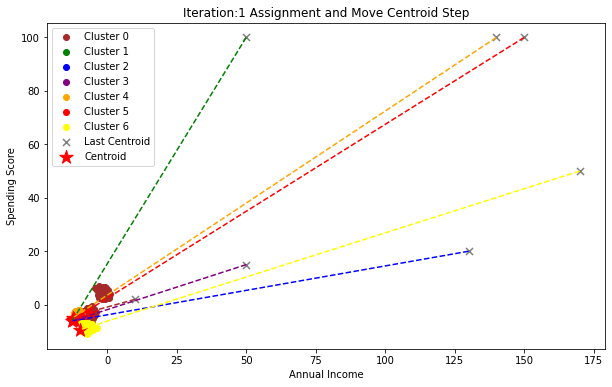

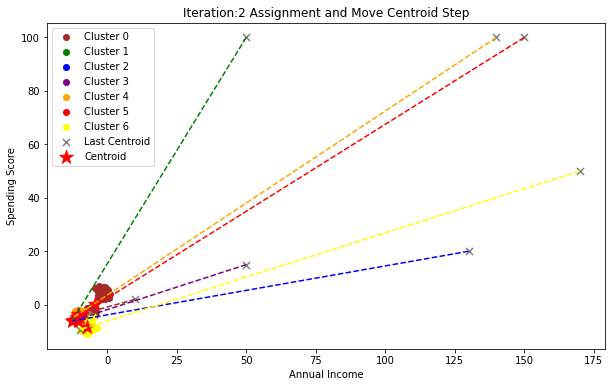

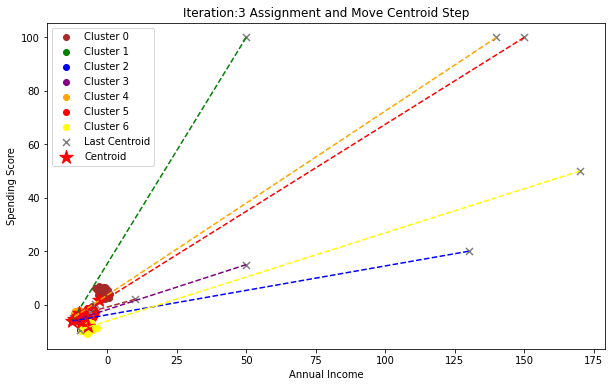

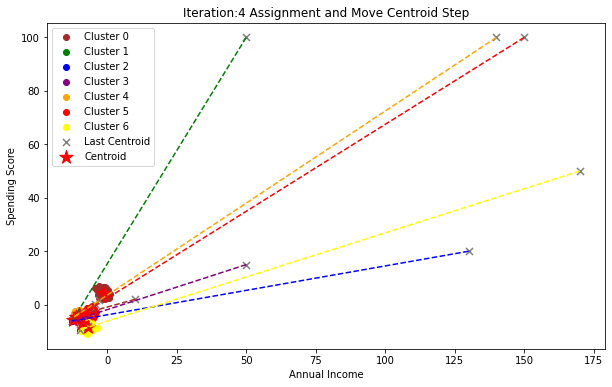

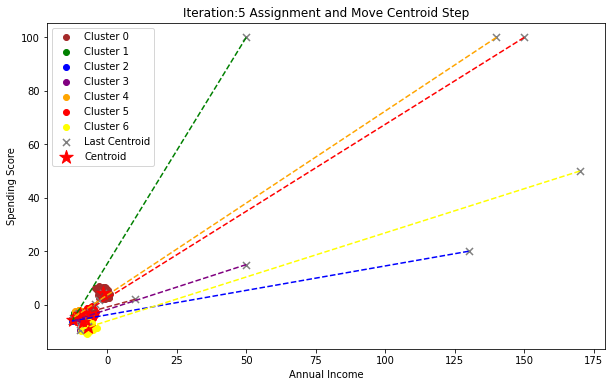

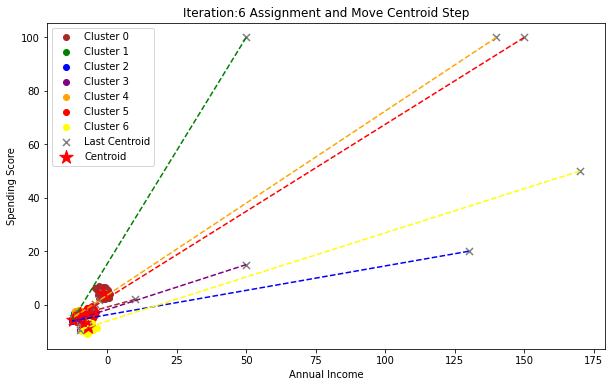

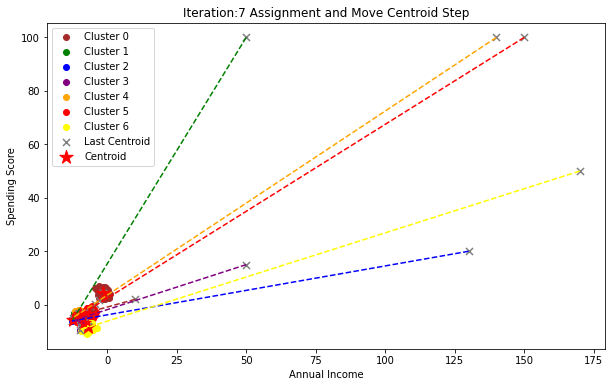

In [12]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100],  [150,100], [170,50]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange', 'c_5':'red', 'c_6':'yellow'}
n_clusters = 7
for i in range(1,8):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array
    
    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4') 
    plt.scatter(X[pred == 5, 0], X[pred == 5, 1], c = 'red', label = 'Cluster 5')
    plt.scatter(X[pred == 6, 0], X[pred == 6, 1], c = 'yellow', label = 'Cluster 6')
    
    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')
    
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')
    
    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)
    
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')
    
    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)